# Coug Data Visualization

In [1]:
# imports
import rosbags_converter as rc
import pandas as pd
import matplotlib.pyplot as plt

/home/claytonsmith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# User Variables

ROSBAGS_DIR = "~/postprocessing"
SAVES_DIR = "/home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags"

MISSION_KEYWORDS = []
VEHICLE_NAMESPACES = ["/coug1", "/coug2", ""]
VEHICLE_IDS = [1,2]

VERBOSE=True

In [3]:
# Convert Rosbags

topic_names = ["/fix", "/dvl/position"]
topics = []
for ns in VEHICLE_NAMESPACES:
    for topic_name in topic_names:
        topics.append(ns+topic_name)

dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS, verbose=True)
if len(dataframes)==0:
    print("converting rosbags")
    typestore = rc.generate_typestore("../../cougars-ros2/src")
    dataframes = rc.convert_rosbags(ROSBAGS_DIR, typestore, 
                                    keywords=MISSION_KEYWORDS,verbose=VERBOSE,
                                    topics=topics)
    rc.save_to_csv(dataframes, SAVES_DIR, verbose=VERBOSE)
    dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS)

Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__2.3_SO-2025-05-01-18-17-13
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__5.0_SO-2025-05-01-19-38-59
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__4.0_SO-2025-05-01-19-23-29
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__3.0_SO-2025-05-01-19-07-06
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__2.2_SO-2025-05-01-18-15-59
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__1.0_stationary_20250501_180412
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug1-bag/converted__6.0_SO-2025-05-01-20-02-31
Loading /home/claytonsmith/postprocessing/Spanish-Oaks-May-2/converted_bags/Bags/coug2-bag/co

In [4]:
# add timestamps
for bag in dataframes.values():
    for df in bag.values():
        if "header.stamp.sec" in df.columns:
            df["timestamp"] = pd.to_datetime(
                df["header.stamp.sec"] * 1_000_000_000 
                + df["header.stamp.nanosec"], unit='ns'
            )



Bags/coug1-bag/converted__2.3_SO-2025-05-01-18-17-13


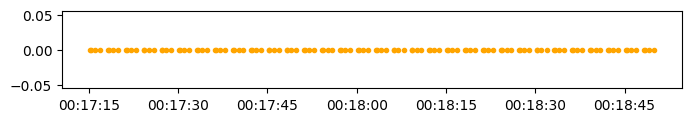

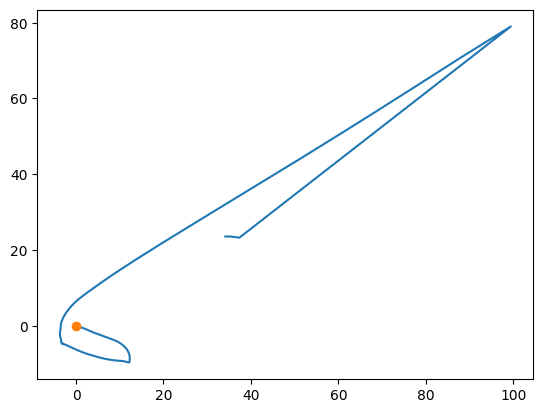



Bags/coug1-bag/converted__5.0_SO-2025-05-01-19-38-59


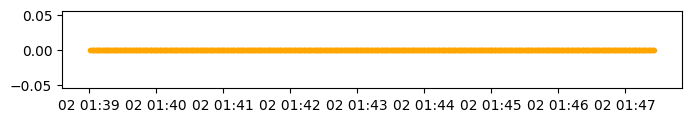

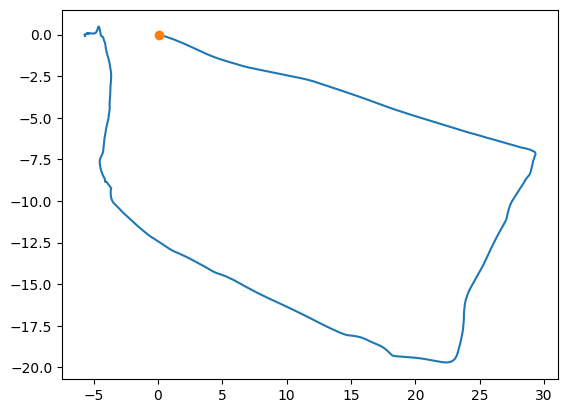



Bags/coug1-bag/converted__4.0_SO-2025-05-01-19-23-29


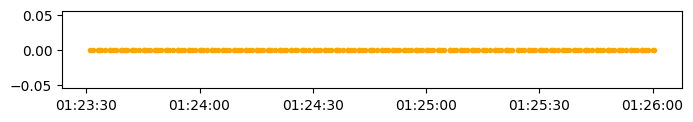

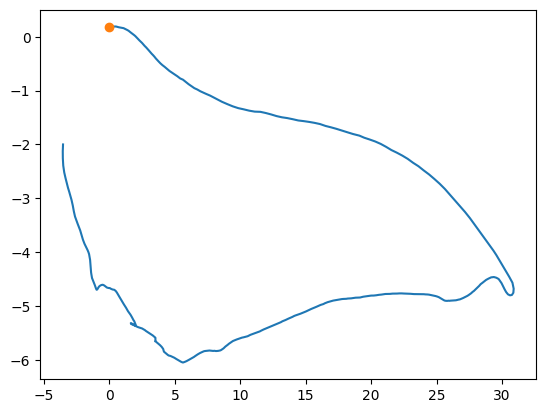



Bags/coug1-bag/converted__3.0_SO-2025-05-01-19-07-06


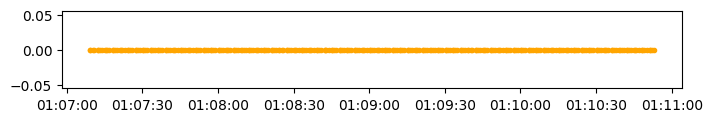

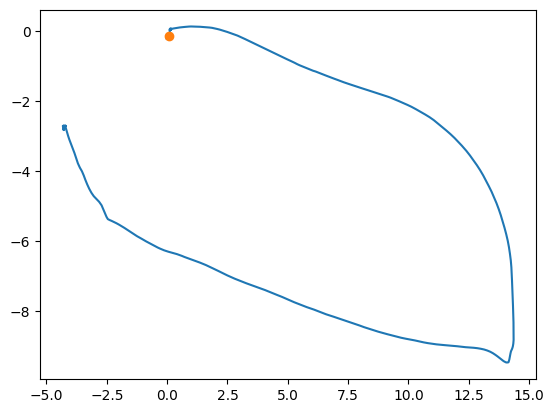



Bags/coug1-bag/converted__2.2_SO-2025-05-01-18-15-59


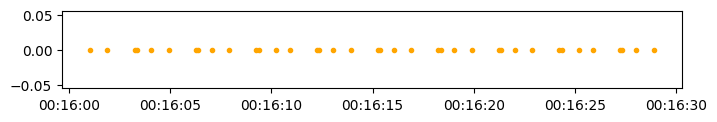

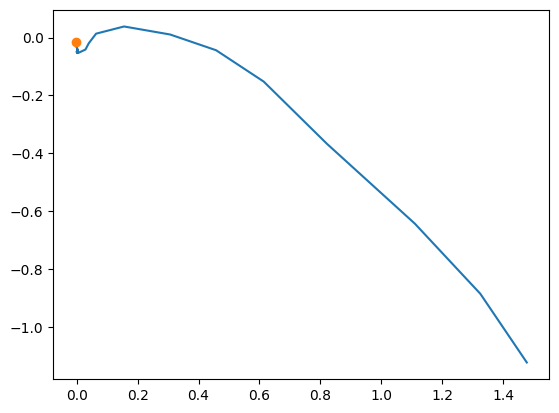



Bags/coug1-bag/converted__1.0_stationary_20250501_180412


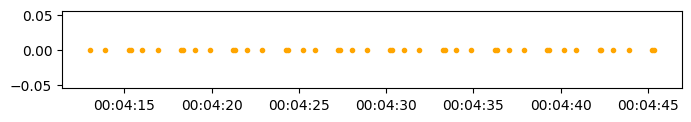

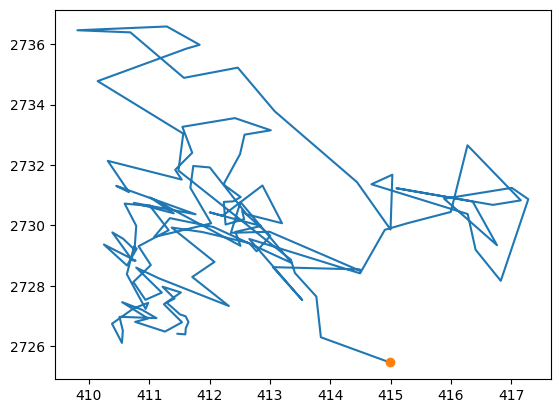



Bags/coug1-bag/converted__6.0_SO-2025-05-01-20-02-31


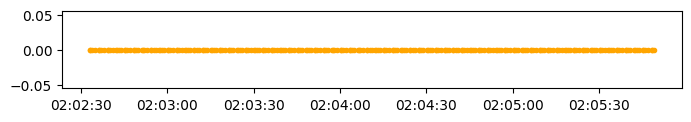

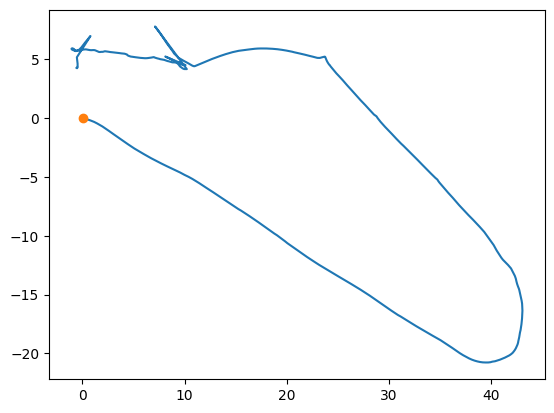



Bags/coug2-bag/converted__3.0_SO-2025-05-02-11-15-45


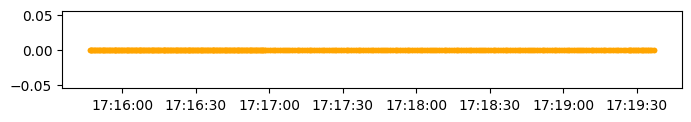



Bags/coug2-bag/converted__6.0_SO-2025-05-02-12-11-09


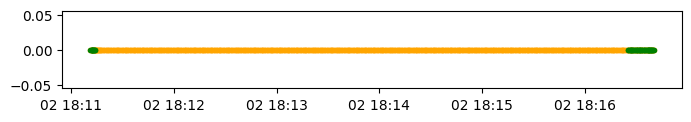



Bags/coug2-bag/converted__2.3_SO-2025-05-02-10-25-51


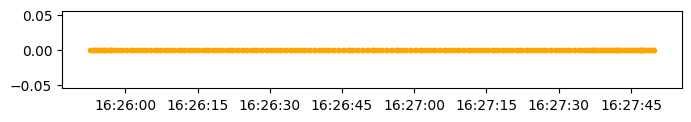



Bags/coug2-bag/converted__5.0_SO-2025-05-02-11-47-37


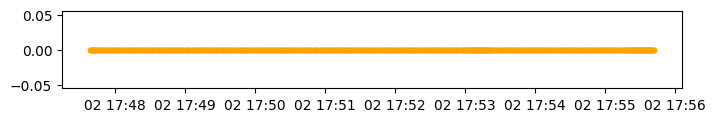



Bags/coug2-bag/converted__2.2_SO-2025-05-02-10-24-36


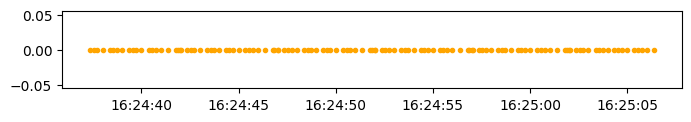



Bags/coug2-bag/converted__4.0_SO-2025-05-02-11-32-10


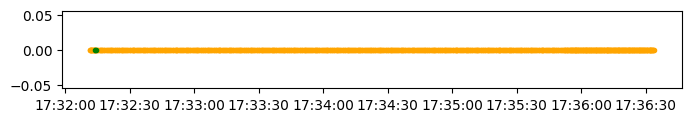

In [10]:
for path, bag in dataframes.items():
    print("\n\n==============================")
    print(path)
    for topic in bag.keys():
        if topic.endswith("/fix"):
            gps_df = bag[topic]
            good_gps_ts = gps_df["timestamp"][gps_df["status.status"]!=-1]
            ok_gps = gps_df["timestamp"][gps_df["latitude"]!=0]
            fig, ax = plt.subplots(figsize=(8, 1))
            ax.plot(ok_gps, [0]*len(ok_gps), 'o', color="orange", markersize='3')
            ax.plot(good_gps_ts, [0]*len(good_gps_ts), 'go', markersize='3')
            plt.show()
        if topic.endswith("/dvl/position"):
            dvl_df = bag[topic]
            plt.plot(dvl_df["position.x"], dvl_df["position.y"])
            plt.plot([dvl_df["position.x"].iloc[0]], [dvl_df["position.y"].iloc[0]], 'o')
            plt.show()